In [82]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  
from datetime import timedelta  

In [83]:
# Load Tensor
with open('../pkl/COVID_sorted_W_tensors_ver2.pkl', 'rb') as f:
    travel_data = pickle.load(f)

In [84]:
travel_data.shape

(22, 54, 108)

In [85]:
week_slices = pd.date_range('2020-01-19', periods=23, freq='W')
xaxis = week_slices[1:]

In [86]:
week_slices

DatetimeIndex(['2020-01-19', '2020-01-26', '2020-02-02', '2020-02-09',
               '2020-02-16', '2020-02-23', '2020-03-01', '2020-03-08',
               '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21'],
              dtype='datetime64[ns]', freq='W-SUN')

In [87]:
df = pd.read_csv("PatientInfo.csv")
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'])
df = df[df['province'].isin(["Seoul", "Gyeonggi-do", "Incheon"])]

In [88]:
confdate = df['confirmed_date']
confdate

0      2020-01-23
1      2020-01-30
2      2020-01-30
3      2020-01-30
4      2020-01-31
          ...    
3415   2020-06-29
3416   2020-06-29
3417   2020-06-29
3418   2020-06-29
3419   2020-06-29
Name: confirmed_date, Length: 2863, dtype: datetime64[ns]

In [89]:
datecount = []

In [90]:
for x in xaxis:
    cnt=0
    for date in confdate:
        if((date<x) & (date> x-timedelta(days=7))):
            cnt=cnt+1
    datecount.append(cnt)
datecount = np.array(datecount)

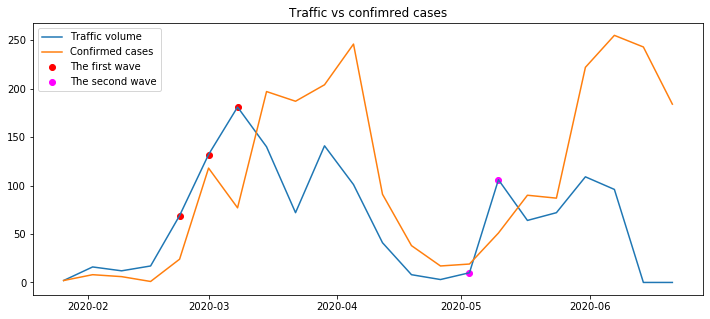

In [91]:
# travel_data.shape
tensors = travel_data[:,:,:54]
traffic = np.sum(np.sum(tensors, 2),1) # total traffic
# outtraffic = np.sum(np.sum(tensors, 1),1)
# traffic = intraffic +outtraffic

plt.figure(figsize=(12,5))
plt.plot(xaxis, traffic, label= 'Traffic volume')
plt.plot(xaxis, datecount, label = 'Confirmed cases')
plt.scatter(xaxis[3+1:6+1], traffic[3+1:6+1], color='red', label = 'The first wave')
plt.scatter(xaxis[-8:-6], traffic[-8:-6], color='magenta', label = 'The second wave')
plt.title("Traffic vs confimred cases")
plt.legend()

In [92]:
np.sum(np.sum(tensors, axis=0)[:54,:54], axis=0)

array([156., 135., 131.,  81.,  75.,  73.,  56.,  49.,  49.,  44.,  43.,
        41.,  39.,  34.,  34.,  30.,  29.,  28.,  27.,  21.,  16.,  15.,
        14.,  14.,  13.,  13.,  12.,  12.,  12.,  10.,  10.,   9.,   9.,
         9.,   8.,   7.,   5.,   3.,   3.,   3.,   3.,   3.,   2.,   2.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.])

In [93]:
np.corrcoef([traffic[:-1], datecount[1:]])

array([[1.        , 0.66161707],
       [0.66161707, 1.        ]])

In [94]:
with open('../pkl/COVID_label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f)

In [95]:
pop = pd.read_csv("./SeoulFloating.csv")
pop.date=pd.to_datetime(pop.date)

In [96]:
monday = pd.date_range('2020-01-06', periods=22, freq='7D')
tueday = pd.date_range('2020-01-07', periods=22, freq='7D')
wedday = pd.date_range('2020-01-08', periods=22, freq='7D')
thuday = pd.date_range('2020-01-09', periods=22, freq='7D')
friday = pd.date_range('2020-01-10', periods=22, freq='7D')
satday = pd.date_range('2020-01-11', periods=22, freq='7D')
sunday = pd.date_range('2020-01-12', periods=21, freq='7D')

In [97]:
day_list = [monday,tueday, wedday, friday,satday,sunday] 

In [98]:
thuday

DatetimeIndex(['2020-01-09', '2020-01-16', '2020-01-23', '2020-01-30',
               '2020-02-06', '2020-02-13', '2020-02-20', '2020-02-27',
               '2020-03-05', '2020-03-12', '2020-03-19', '2020-03-26',
               '2020-04-02', '2020-04-09', '2020-04-16', '2020-04-23',
               '2020-04-30', '2020-05-07', '2020-05-14', '2020-05-21',
               '2020-05-28', '2020-06-04'],
              dtype='datetime64[ns]', freq='7D')

In [99]:
sunday

DatetimeIndex(['2020-01-12', '2020-01-19', '2020-01-26', '2020-02-02',
               '2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01',
               '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29',
               '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26',
               '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='7D')

In [100]:
tueday[-3]

Timestamp('2020-05-19 00:00:00', freq='7D')

In [101]:
# a = pop[pop['city']=='Guro-gu']
# # a.date.unique()
# b = a[a['date'].isin(tueday[-3:-1])]
# b.groupby(['date','hour'])['fp_num'].count()
# # print(b.shape)
# # c = b.groupby('date')['fp_num'].sum()
# # plt.plot(c)

In [102]:
 def node_float_pop(nodename):
    if(nodename=='Dongjak-gu'):
        nodename = 'Dongjag-gu'
    node_pop = pop[pop['city']==nodename]
    node_pop = node_pop[np.invert(node_pop['date'].isin(thuday))]
    fp_list = []
    for d in sunday:
        condition = (node_pop['date']< d) & (node_pop['date'] >= d - timedelta(days=7))
        filtered_pop = node_pop[condition]
        fpsum = filtered_pop['fp_num'].sum()
        if(fpsum>0):
            fp_list.append(fpsum)
        else:
            fp_list.append(fp_list[-1])
    return np.array(fp_list)

In [103]:
# node_float_pop('Guro-gu')

In [104]:
# node_float = node_float_pop('Geumcheon-gu')
# plt.figure(figsize=(12,5))
# plt.scatter(sunday, node_float)

In [105]:
def node_confirmed_case(node_name):
    node_confdate = df[df['city']==node_name]['confirmed_date']
    datecount = []
    for x in xaxis:
        cnt=0
        for date in node_confdate:
            if((date<x) & (date>= x-timedelta(days=7))):
                cnt=cnt+1
        datecount.append(cnt)
    datecount = np.array(datecount)
    return datecount

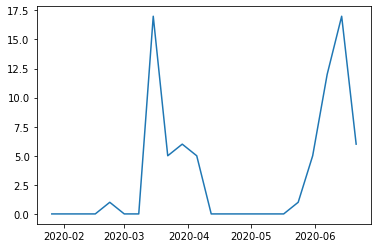

In [106]:
plt.plot(xaxis, node_confirmed_case('Guro-gu'))

In [107]:
tensors = travel_data[:,:54,:54]
tensors.shape

(22, 54, 54)

In [108]:
def node_patient_traffic(node_num):
    cnt_num = node_num
    intraffic = np.sum(tensors[:,:,cnt_num], 1) #in-traffic
    outtraffic = np.sum(tensors[:,cnt_num,:], 1) #outtraffic
    return intraffic + outtraffic

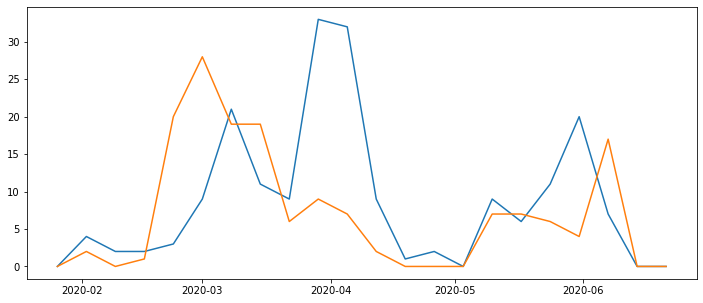

In [109]:
plt.figure(figsize=(12,5))
plt.plot(week_slices[1:], node_patient_traffic(0))
plt.plot(week_slices[1:], node_patient_traffic(4))

In [110]:
node_patient_traffic(3)[:-3]

array([ 0.,  0.,  0.,  0.,  5., 15., 74., 26., 26.,  1.,  2.,  0.,  0.,
        0.,  0.,  5.,  5.,  3.,  2.])

In [111]:
node_confirmed_case('Guro-gu')[:-3]

array([ 0,  0,  0,  0,  1,  0,  0, 17,  5,  6,  5,  0,  0,  0,  0,  0,  0,
        1,  5])

In [112]:
# nodenum = 5
def three_plots_corr(nodenum):
    fig, axs = plt.subplots(3,figsize=(12,8))
    
    nodename = label_dict[nodenum]
    fig.suptitle(nodename, fontsize=20)

    flopop = node_float_pop(nodename)[-19:]
    pait = node_patient_traffic(nodenum)[:-3]
    conf = node_confirmed_case(nodename)[:-3]

    axs[0].plot(xaxis[:-3], flopop, label = 'floating population')
    axs[1].plot(xaxis[:-3], pait, label = 'patient traffic')
    axs[2].plot(xaxis[:-3], conf, label = 'confirmed cases')
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()

    print(np.corrcoef([flopop[:-1], pait[1:]]))
    print(np.corrcoef([pait[1:-1], conf[2:]]))

In [113]:
xaxis[:-3][0::4]

DatetimeIndex(['2020-01-26', '2020-02-23', '2020-03-22', '2020-04-19',
               '2020-05-17'],
              dtype='datetime64[ns]', freq='4W-SUN')

[[1.         0.85380695]
 [0.85380695 1.        ]]
[[1.         0.90476117]
 [0.90476117 1.        ]]


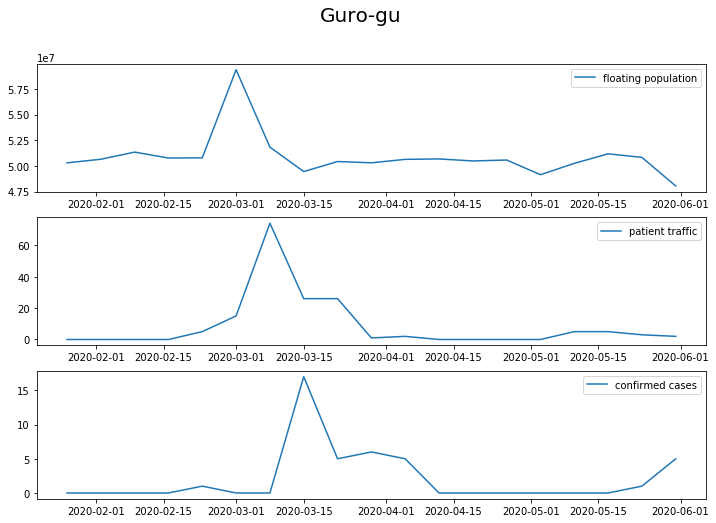

In [114]:
three_plots_corr(3)

In [115]:
# granger_df = pd.DataFrame([xaxis[:-3], np.array(flopop), pait, conf]).T
# granger_df.columns = ['date','flopop','patient','confirmation']
# granger_df = granger_df.set_index('date')

In [116]:
# # n_obs=1
# dataset = granger_df
# # X_train, X_test = dataset[0:-n_obs], dataset[-n_obs:]
# X_train = dataset
# print(X_train.shape) #, X_test.shape)

In [117]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))
    return result[1]

In [118]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [119]:
# test = 'ssr-chi2test'
def grangers_causality_matrix(X_train, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
#             print(r,c)
            test_result = grangercausalitytests(X_train[[r,c]], maxlag=maxlag, verbose=False)
#             print(test_result)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: 
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset

In [158]:
var1 = 'flopop'
var2 = 'patient'
nodenum=3
nodename = label_dict[nodenum]
flopop = node_float_pop(nodename)[-19:]
pait = node_patient_traffic(nodenum)[:-3]
conf = node_confirmed_case(nodename)[:-3]
# #
granger_df = pd.DataFrame([xaxis[:-3], np.array(flopop), pait, conf]).T
granger_df.columns = ['date','flopop','patient','confirmation']
dataset = granger_df.set_index('date')
dataset = dataset[[var1,var2]]
# #
p1 = augmented_dickey_fuller_statistics(dataset[var1])
p2 = augmented_dickey_fuller_statistics(dataset[var2])

dataset[var2]

date
2020-01-26     0
2020-02-02     0
2020-02-09     0
2020-02-16     0
2020-02-23     5
2020-03-01    15
2020-03-08    74
2020-03-15    26
2020-03-22    26
2020-03-29     1
2020-04-05     2
2020-04-12     0
2020-04-19     0
2020-04-26     0
2020-05-03     0
2020-05-10     5
2020-05-17     5
2020-05-24     3
2020-05-31     2
Name: patient, dtype: object

In [153]:
def granger_caus(var1, var2):
    cnt=0
    p_list = []
    #22 25 26 28 
    for nodenum in np.append(np.arange(21),[22,25,26,28]):
        nodename = label_dict[nodenum]
        #
        try:
            flopop = node_float_pop(nodename)[-19:]
            pait = node_patient_traffic(nodenum)[:-3]
            conf = node_confirmed_case(nodename)[:-3]
            #
            granger_df = pd.DataFrame([xaxis[:-3], np.array(flopop), pait, conf]).T
            granger_df.columns = ['date','flopop','patient','confirmation']
            dataset = granger_df.set_index('date')
            dataset = dataset[[var1,var2]]
            #
            p1 = augmented_dickey_fuller_statistics(dataset[var1])
            p2 = augmented_dickey_fuller_statistics(dataset[var2])
            print(p1,p2)
            #
            if(p1<0.05):
                if(p2<0.05):
                    cnt=cnt+1
#                     print(str(nodenum)+",")
#                     var_2to1 = grangers_causality_matrix(dataset, variables = dataset.columns).iloc[0,1]
                    var_1to2 = grangers_causality_matrix(dataset, variables = dataset.columns).iloc[1,0] # var1->var2
                    p_list.append(var_1to2)
#                     print(nodenum, label_dict[nodenum])
#                     print(grangers_causality_matrix(dataset, variables = dataset.columns))
        except Exception:
            continue
    print("cnt",cnt)
    return p_list

In [154]:
def FDR(sorted_array):
    sample_size=len(sorted_array)
    cnt=0
    for i in range(sample_size):
        if(sorted_array[i]< 0.05*(i+1)/(sample_size)):
            cnt+=1
    return(cnt)

In [155]:
maxlag=4

In [156]:
test1 = np.sort(granger_caus('flopop','patient'))
print(test1)
print(FDR(test1))

0.009026400740617932 0.5825492464621462
0.00210650569372559 0.3920533378218448
0.004490306132582189 0.3563167631660439
0.05244996174140841 0.5544396046508052
0.058486777893332856 0.9087150132872492
0.14058329371709433 0.03605554167872633
0.08285694924115844 0.002703730107962587
0.003334788607865828 0.13519479365508374
0.005572032265942964 8.670156610993644e-07
0.06153040936074235 0.04657284659052638
0.002729804535213516 0.0001005380196182975
0.02073123608266873 0.4571480963593855
0.5217611582873728 0.01764979265644122
0.4320047806710441 0.2057337462575458
0.0029472317834145366 3.2250808395638782e-24
0.1238270332933265 0.015732099819685916
0.0030869194312128224 0.6484940133189798
0.00593811918558471 0.7007488869911522
0.026864460491137866 0.32051039215594324
0.0020659550142148628 0.013509316366513126
0.006898055453394005 0.07972751462643551
0.002436038917268893 0.0003070222318083142
0.0029696148173586133 0.7372946034022754
0.002836318027881009 0.03571633817295085
0.005332470694896089 0.

In [148]:
test2 = np.sort(granger_caus('patient','confirmation'))
print(test2)
print(FDR(test2))

cnt 0
[]
0


In [130]:
test3 = np.sort(granger_caus('flopop','confirmation'))
print(test3)
print(FDR(test3))

cnt 7
[0.     0.     0.     0.0143 0.0338 0.1852 0.3567]
5


In [49]:
sample_size=11
for i in range(1,sample_size+1):
    print(0.05*i/sample_size)

0.004545454545454546
0.009090909090909092
0.01363636363636364
0.018181818181818184
0.022727272727272728
0.02727272727272728
0.03181818181818182
0.03636363636363637
0.04090909090909091
0.045454545454545456
0.05


In [50]:
cnt=0
#22 25 26 28 
for nodenum in np.append(np.arange(21),[22,25,26,28]):
    nodename = label_dict[nodenum]
    #
    try:
        flopop = node_float_pop(nodename)[-18:]
        pait = node_patient_traffic(3)[:-3]
        conf = node_confirmed_case(nodename)[:-3]
        #
        granger_df = pd.DataFrame([xaxis[:-3], np.array(flopop), pait, conf]).T
        granger_df.columns = ['date','flopop','patient','confirmation']
        dataset = granger_df.set_index('date')
        dataset = dataset[['patient','confirmation']]
        #
        p1 = augmented_dickey_fuller_statistics(dataset['patient'])
        p2 = augmented_dickey_fuller_statistics(dataset['confirmation'])
#         p3 = augmented_dickey_fuller_statistics(dataset['confirmation'])
        #
        if(p1<0.05):
            if(p2<0.05):
                cnt=cnt+1
#                 if(p3<0.05):
#                     cnt=cnt+1
                print(nodenum, label_dict[nodenum])
                print(grangers_causality_matrix(dataset, variables = dataset.columns))
    except Exception:
        continue

In [51]:
cnt

0

In [52]:
adjmat = np.sum(tensors,0)

In [53]:
df = pd.DataFrame([[-1,-1,-1]])
for i in range(adjmat.shape[0]):
    for j in range(adjmat.shape[1]):
        if(adjmat[i,j]==0):
            continue
        if(label_dict[i] != 'nan' and label_dict[j] != 'nan'):
            a_row = pd.Series([label_dict[i], label_dict[j], adjmat[i,j]])
            row_df = pd.DataFrame([a_row])
            df = pd.concat([df, row_df])
#         df = pd.DataFrame(pd.Series(i,j,adjmat[i,j]), index=range(1),columns=['from','to','weight'])

In [54]:
# df.iloc[1:].to_csv('../gephi/Seoul_graph.csv')